### Demo 
#### Week 1: Lecture 2

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.set_option('precision', 2)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
sns.set()
sns.set_context('talk')

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

### Step 1: Formulate 

What information about gender and age could we determine from names? In particular, what guesses can we make about the sample based on the administrative dataset? 

**Question** 

What might be a connection between gender and name? What might be a connection between age and name?

In [36]:
# YOUR RESPONSE HERE

### Step 2: Collect and Process the Data  

In [38]:
students = pd.read_csv('roster_first_names.csv')
students['Name'] = students['Name'].str.lower()

In [39]:
def random_name(number):
    return ", ".join(np.random.choice(students['Name'], size = number, replace = False))

In [15]:
interact(random_name, number=5);

interactive(children=(IntSlider(value=5, description='number', max=15, min=-5), Output()), _dom_classes=('widg…

In [40]:
print(f"There are {len(students)} students on the roster.")

There are 99 students on the roster.


**Question** 

 - How many students are in the class?
 - How can you read the dataset `babynames.csv'

In [36]:
# YOUR RESPONSE HERE

In [41]:
# YOUR CODE HERE

### Step 3: Understand the Data through Tables and Charts  

How anonymous is the sample? Would length of name be an indicator of person? 

Let's determine the distribution of lengths of names in the sample?

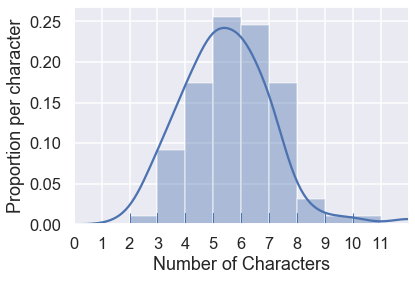

In [42]:
sns.distplot(students['Name'].str.len(),
             rug=True,
             bins=np.arange(12),
             axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.gca().set_ylabel('Proportion per character');

### Gender

Let's understand the distribution of gender over time.

In [43]:
pivot_year_name_count = pd.pivot_table(
    babynames, index='Year', columns='Gender',
    values='Count', aggfunc=np.sum)

In [44]:
pivot_year_name_count

Gender,F,M
Year,,
1880,9.10e+04,1.10e+05
1881,9.20e+04,1.01e+05
1882,1.08e+05,1.14e+05
1883,1.12e+05,1.05e+05
1884,1.29e+05,1.14e+05
1885,1.33e+05,1.08e+05
1886,1.45e+05,1.11e+05
...,...,...
1983,1.67e+06,1.79e+06


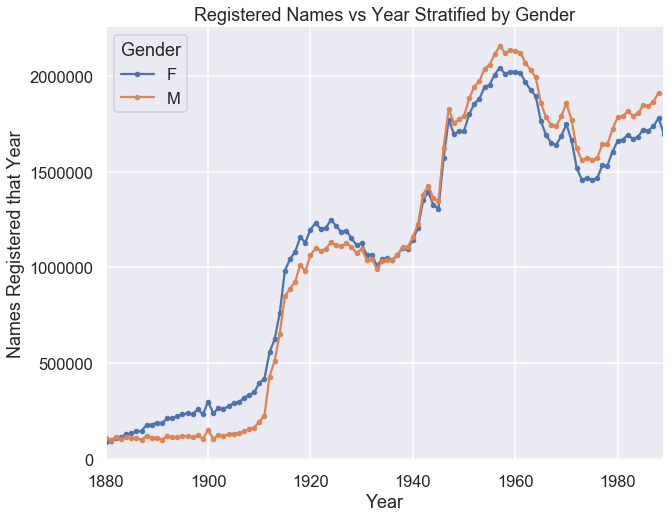

In [48]:
pivot_year_name_count.plot(marker=".", figsize = (10,8))
plt.title("Registered Names vs Year Stratified by Gender")
plt.gca().set_ylabel('Names Registered that Year');

In [49]:
babynames['Name'] = babynames['Name'].str.lower()

gender_counts = pd.pivot_table(babynames, index='Name', columns='Gender', values='Count',
                            aggfunc='sum', fill_value=0., margins=True)
gender_counts

Gender,F,M,All
Name,,,
aadam,0,10,10
aadil,0,6,6
aage,0,7,7
aagot,5,0,5
aaisha,35,0,35
aakash,0,62,62
aaliya,5,0,5
...,...,...,...
zygmund,0,168,168


In [51]:
prop_female = gender_counts['F'] / gender_counts['All']
gender_counts['prop_female'] = prop_female
gender_counts

Gender,F,M,All,prop_female
Name,,,,
aadam,0,10,10,0.00
aadil,0,6,6,0.00
aage,0,7,7,0.00
aagot,5,0,5,1.00
aaisha,35,0,35,1.00
aakash,0,62,62,0.00
aaliya,5,0,5,1.00
...,...,...,...,...
zygmund,0,168,168,0.00


In [52]:
def gender_from_name(name):
    if name in gender_counts.index:
        prop = gender_counts.loc[name, 'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

gender_from_name('daniel')

'M'

In [31]:
interact(gender_from_name, name='chris');

interactive(children=(Text(value='chris', description='name'), Output()), _dom_classes=('widget-interact',))

In [53]:
students['Prediction_gender'] = students['Name'].apply(gender_from_name)
students.head()

,Name,Site Role,Prediction
0,adia,Student,F
1,aditya,Student,M
2,andy,Student,M
3,anya,Student,F
4,avery,Student,M


### Age

In [22]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (
    babynames
    .groupby('Name')
    .apply(avg_year)
    .rename('avg_year')
    .to_frame()
)
avg_years

,avg_year
Name,
aadam,1987.50
aadil,1985.00
aage,1915.00
aagot,1915.00
aaisha,1985.37
aakash,1984.74
aaliya,1988.00
...,...
zygmont,1919.16


In [37]:
def age_from_name(name):
    if name in avg_years.index:
        value = int(avg_years.loc[name, 'avg_year'])
        years = (dt.now() - dt(value,1,1)).days // 365 
        return years
    else:
        return 'Name not in dataset'

In [40]:
interact(age_from_name, name='daniel');

57

In [41]:
students['Prediction_age'] = students['Name'].apply(age_from_name)
students.head()

,Name,Site Role,Prediction_gender,Prediction_age
0,adia,Student,F,42
1,aditya,Student,M,36
2,andy,Student,M,62
3,anya,Student,F,42
4,avery,Student,M,63


### Probability 

Calculate probability through counting occurences

$$ \large
\textbf{P}\hspace{0pt}(\texttt{Year} \,\,\, | \,\,\, \texttt{Name} ) = \frac{\textbf{Count}(\texttt{Year and Name})}{\textbf{Count}(\texttt{Name})}
$$

Conditional probability in Bayes rule

$$ \large
\textbf{P}\hspace{0pt}(\texttt{Year} \,\,\, | \,\,\, \texttt{Name} ) = \frac{\textbf{P}\hspace{0pt}(\texttt{Name} \,\,\, | \,\,\, \texttt{Year} ) \; \textbf{P}\hspace{0pt}(\texttt{Year})}{\textbf{P}(\texttt{Name})}
$$

This gives us a way to incorporate our knowledge of the problem.